# Importing libaries and data

In [123]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from matplotlib.pyplot import figure

In [124]:
# Identifying a path to where data is stored
path = 'C:/Users/andyc/Machine Learning - ClimateWins'

In [125]:
# Importing the pleasant_weather data set
PW_pred = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_weather.csv'), index_col = False)

In [126]:
PW_pred.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
# Importing the Climatewins_scaled data set
cw_scaled = pd.read_csv(os.path.join(path, 'Data Sets', 'ClimateWins_scaled.csv'), index_col = 0)

In [128]:
cw_scaled.head()

,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.731975,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.731824,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.731673,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.731523,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.731372,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


# Data Cleaning

In [130]:
# Dropping unneeded station data from cw_scaled dataset
cw_reduced=cw_scaled.drop(columns=['id', 
'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [131]:
cw_reduced.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [132]:
# Creating an 'X' and 'y' dataframe by dropping the date and month columns.
X = cw_reduced.drop(['DATE', 'MONTH'], axis=1)
y = PW_pred.drop(['DATE'],axis=1)

In [133]:
# Splitting the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=26)

In [134]:
# Checking the rows and columns of the training and test sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [135]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


# Scaling data

In [137]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 1.07947515 -1.44337911  1.45868509 ... -0.01157645 -0.00550709
  -0.00670159]
 [-0.57933576 -0.02347803 -0.43920963 ...  1.73151886  1.77364943
   1.48870627]
 [ 0.66477242 -0.02347803  0.64530164 ... -1.66451165 -1.20985919
  -1.9334771 ]
 ...
 [-0.99403848  0.68647251  0.103046   ...  1.22061161  0.70615552
   1.5749798 ]
 [-2.23814666  2.95831424  1.18755727 ... -1.15360441 -0.71716969
  -1.81844573]
 [ 0.66477242 -0.02347803 -0.98146527 ... -1.33392461 -1.073001
  -1.38707807]]


C:\Users\andyc\AppData\Local\Temp\ipykernel_20200\3248398980.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend().set_visible(False)
C:\Users\andyc\AppData\Local\Temp\ipykernel_20200\3248398980.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend().set_visible(False)


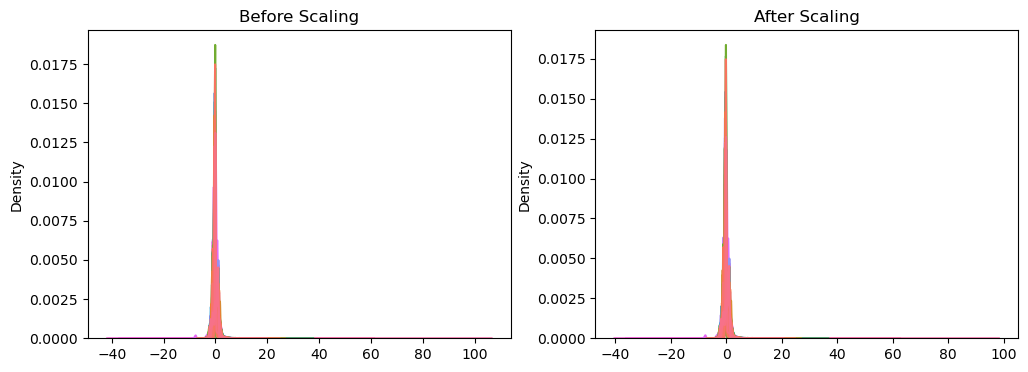

In [138]:
# Displaying before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)
ax1.legend().set_visible(False)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)
ax2.legend().set_visible(False)

plt.show()

# Testing number of layers, nodes iterations, and tolerance.

In [140]:
# Test 1
mlp_1 = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=800, tol=0.0001)

# Fitting the data to the model
mlp_1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=800)

In [141]:
# Testing the Test 1 ANN accuracy
y_pred = mlp_1.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp_1.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5266093423193121
0.5250958522133148


ANN Test 1 for y_pred_test/y_test has an accuracy score of 52.7%, while the train data has an accuracy score of 52.5%.

In [143]:
# Test 2
mlp_2 = MLPClassifier(hidden_layer_sizes=(10, 4, 6), max_iter=1000, tol=0.00001)

# Fitting the data to the model
mlp_2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 4, 6), max_iter=1000, tol=1e-05)

In [144]:
# Testing the Test 2 ANN accuracy
y_pred_2 = mlp_2.predict(X_train)
print(accuracy_score(y_pred_2, y_train))
y_pred_test_2 = mlp_2.predict(X_test)
print(accuracy_score(y_pred_test_2, y_test))

0.5147571461770858
0.512373649355176


ANN Test 2 for y_pred_test_2/y_test has an accuracy score of 51.5%, while the train data has an accuracy score of 51.2%.

In [146]:
# Test 3
mlp_3 = MLPClassifier(hidden_layer_sizes=(35, 20, 25), max_iter=3000, tol=0.0000001)

# Fitting the data to the model
mlp_3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(35, 20, 25), max_iter=3000, tol=1e-07)

In [147]:
# Testing the Test 3 ANN accuracy
y_pred_3 = mlp_3.predict(X_train)
print(accuracy_score(y_pred_3, y_train))
y_pred_test_3 = mlp_3.predict(X_test)
print(accuracy_score(y_pred_test_3, y_test))

0.738554496862654
0.6690484489369118


ANN Test 3 for y_pred_test_3/y_test has an accuracy score of 73.9%, while the train data has an accuracy score of 67.0%.

In [149]:
locations = list({x.split("_")[0] for x in cw_reduced.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

# Confusion Matrix

C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


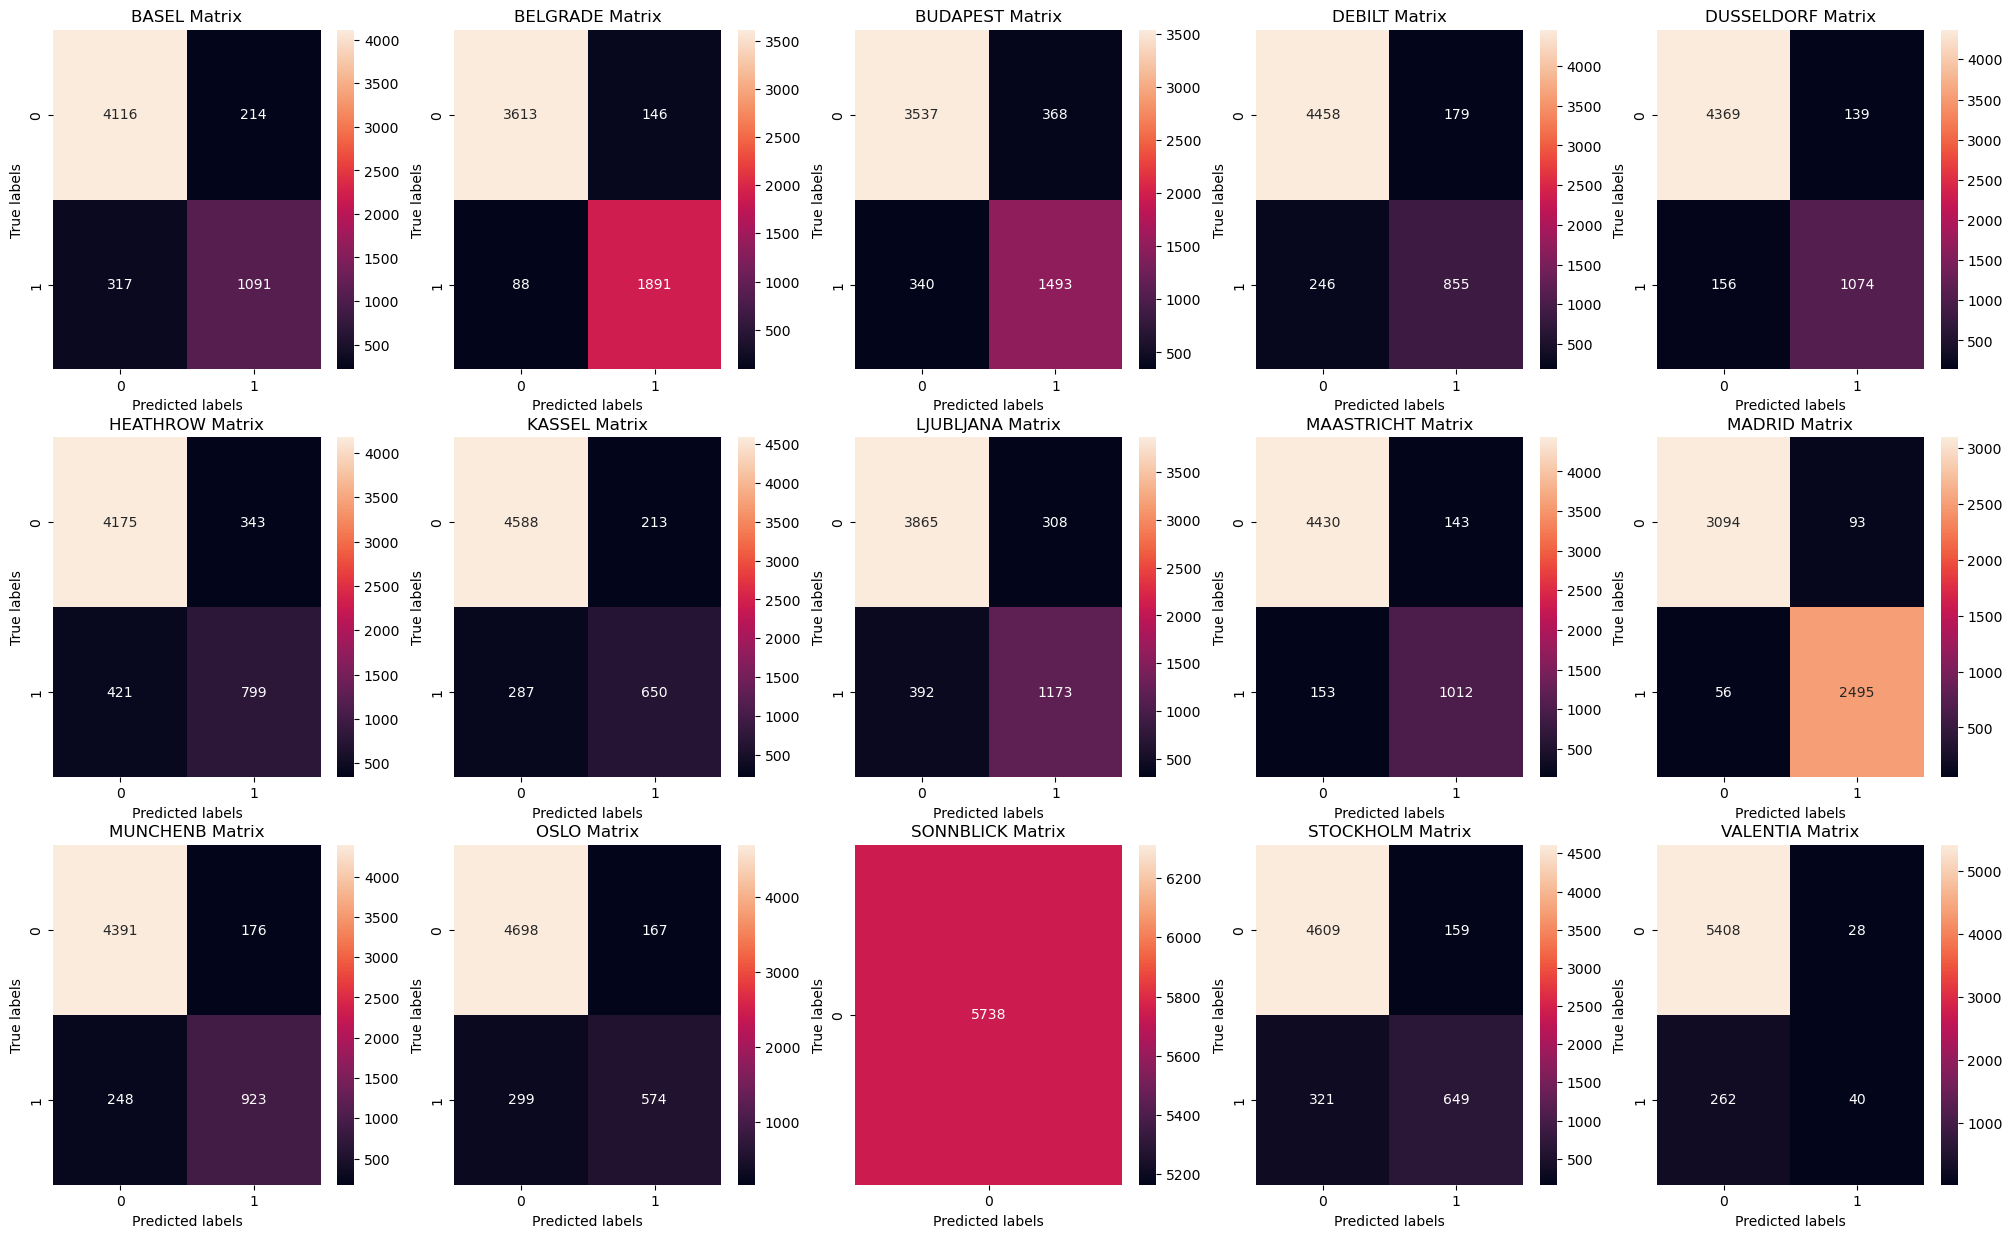

In [175]:
# Test 1
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels);
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


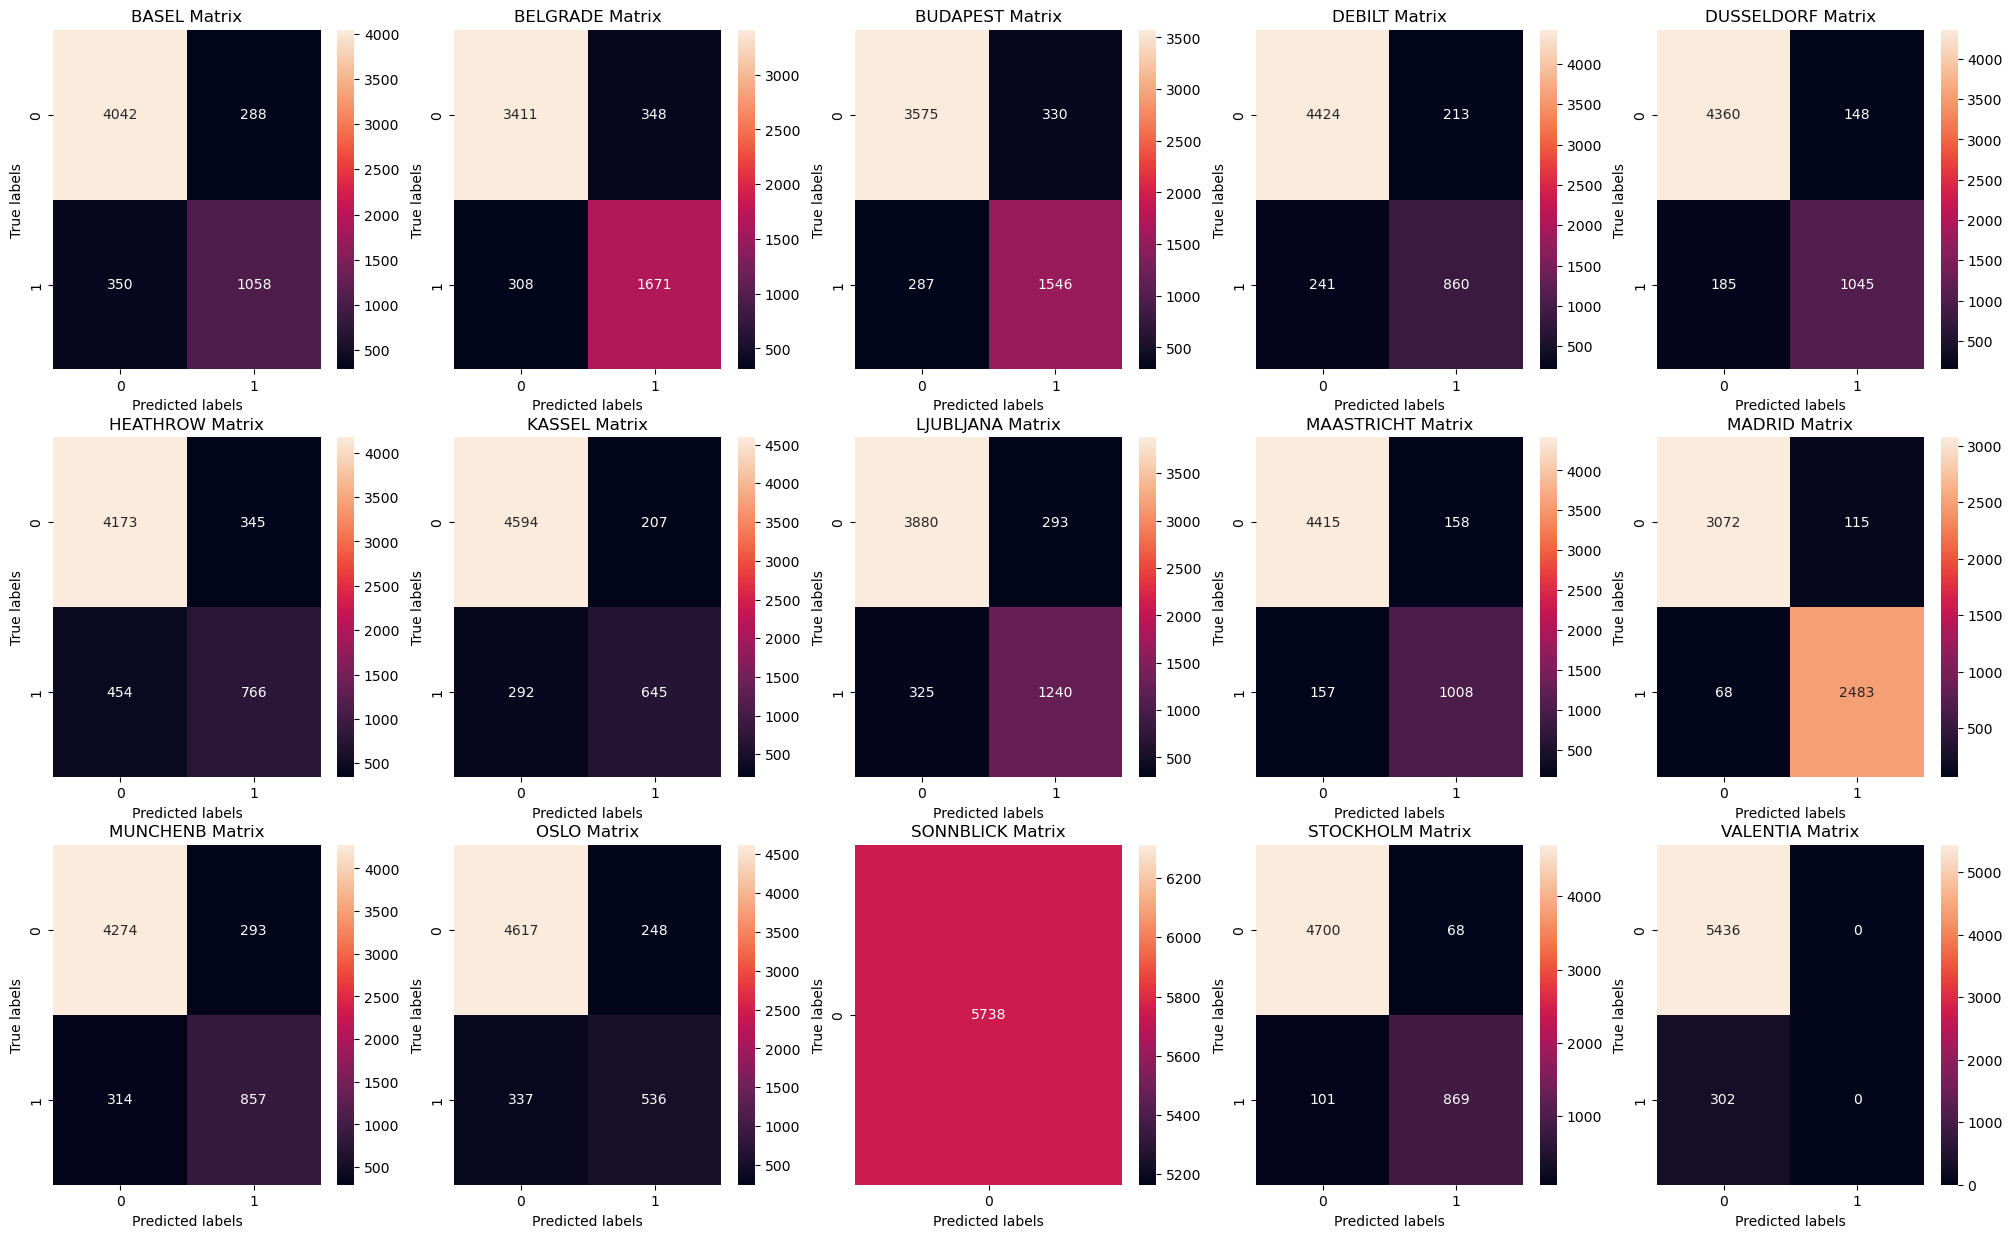

In [177]:
# Test 2
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test_2[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

C:\Users\andyc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


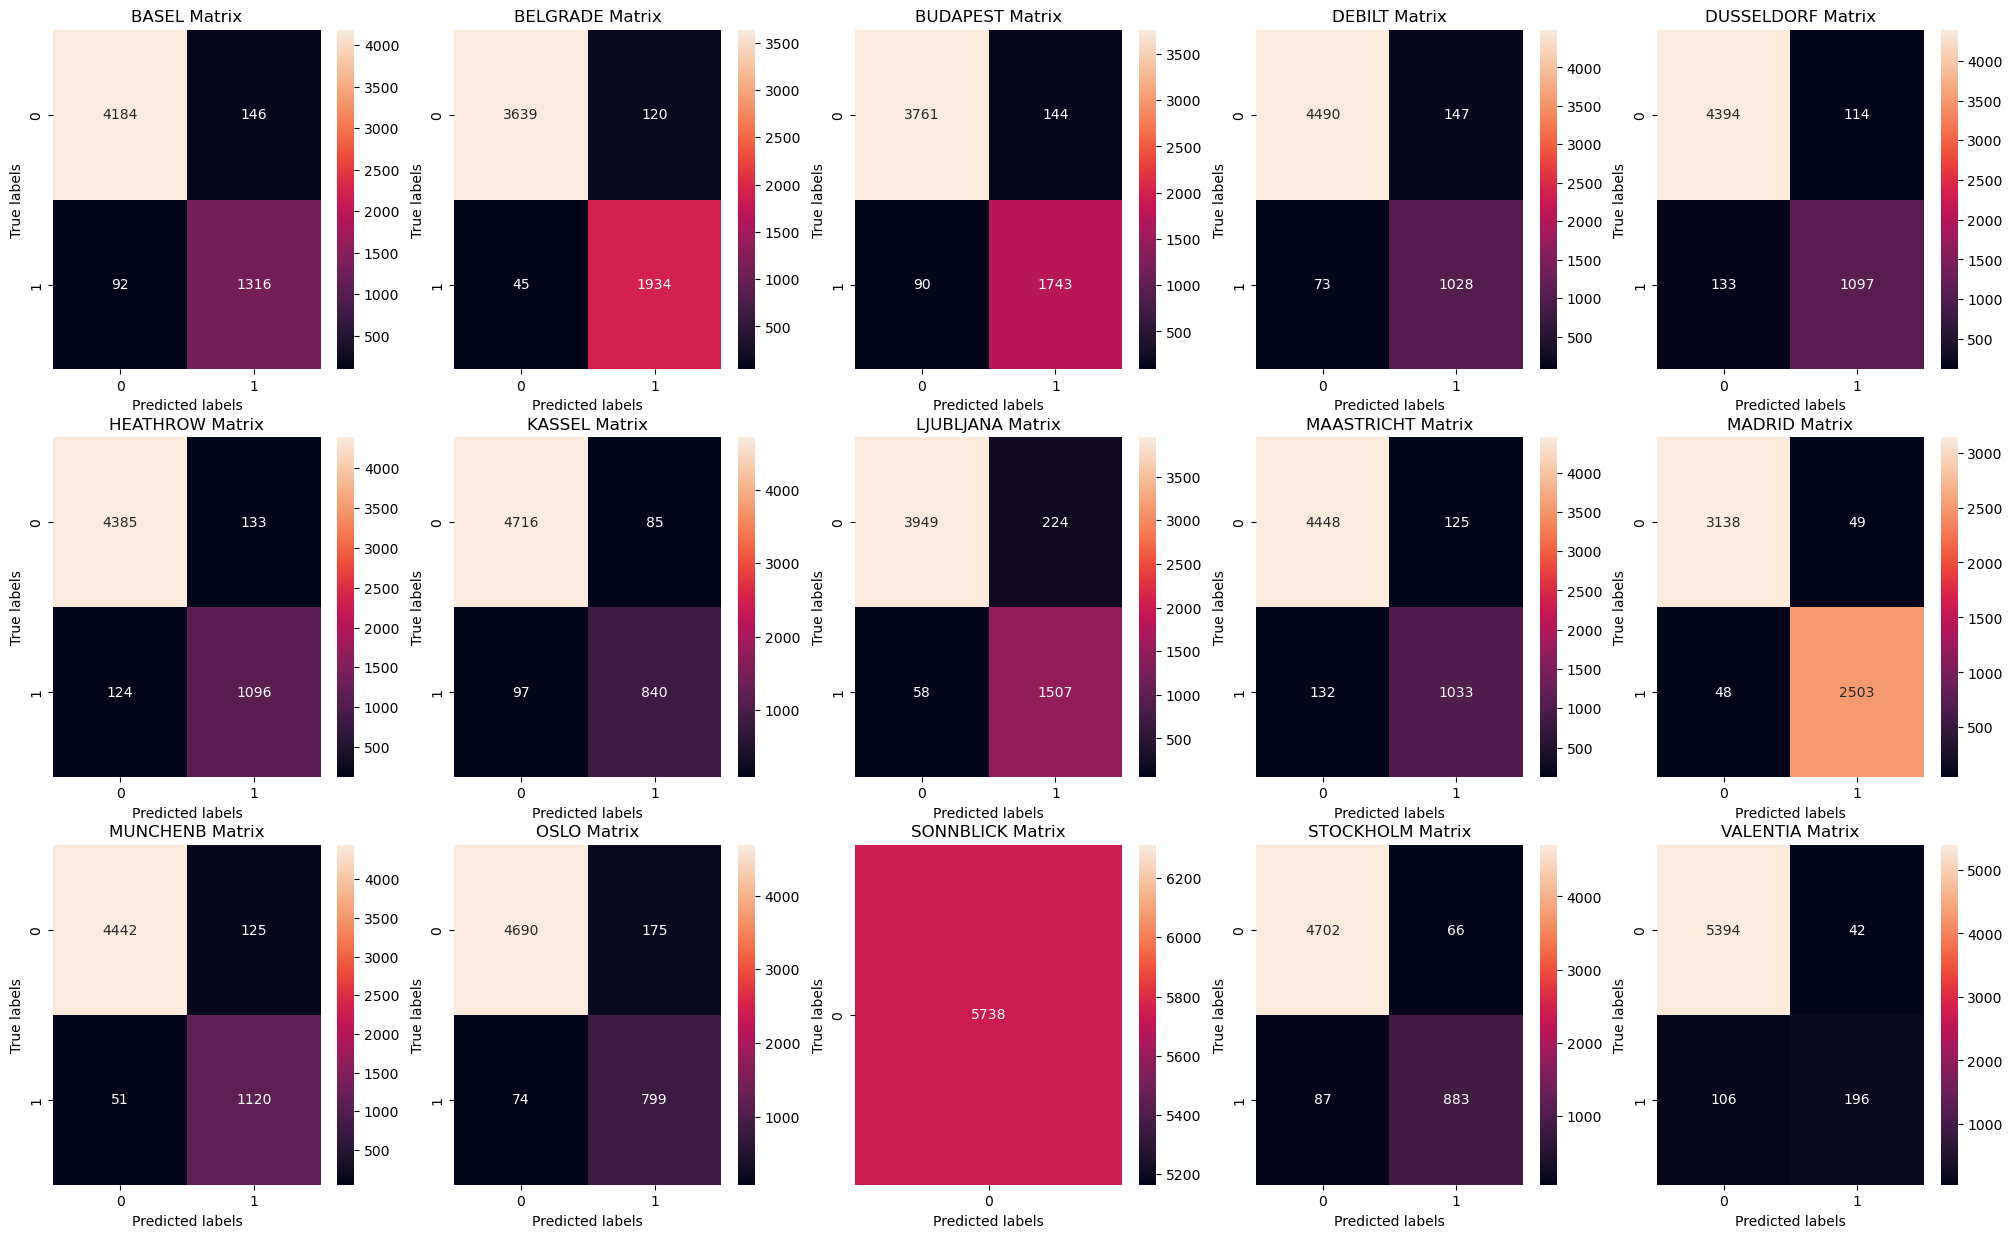

In [179]:
# Test 3
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test_3[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1